In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2021/players.csv
/kaggle/input/nfl-big-data-bowl-2021/week6.csv
/kaggle/input/nfl-big-data-bowl-2021/week16.csv
/kaggle/input/nfl-big-data-bowl-2021/week9.csv
/kaggle/input/nfl-big-data-bowl-2021/week2.csv
/kaggle/input/nfl-big-data-bowl-2021/week3.csv
/kaggle/input/nfl-big-data-bowl-2021/week8.csv
/kaggle/input/nfl-big-data-bowl-2021/week11.csv
/kaggle/input/nfl-big-data-bowl-2021/games.csv
/kaggle/input/nfl-big-data-bowl-2021/week13.csv
/kaggle/input/nfl-big-data-bowl-2021/week10.csv
/kaggle/input/nfl-big-data-bowl-2021/week12.csv
/kaggle/input/nfl-big-data-bowl-2021/week5.csv
/kaggle/input/nfl-big-data-bowl-2021/week15.csv
/kaggle/input/nfl-big-data-bowl-2021/week7.csv
/kaggle/input/nfl-big-data-bowl-2021/week1.csv
/kaggle/input/nfl-big-data-bowl-2021/week14.csv
/kaggle/input/nfl-big-data-bowl-2021/week4.csv
/kaggle/input/nfl-big-data-bowl-2021/week17.csv
/kaggle/input/nfl-big-data-bowl-2021/plays.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/players.csv')
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [4]:
players.shape

(1303, 7)

In [5]:
#checking for any NA
players.isnull().sum()

nflId          0
height         0
weight         0
birthDate      0
collegeName    0
position       0
displayName    0
dtype: int64

In [6]:
#Converting birthDate to birthYear
players['birthDate'] = pd.to_datetime(players['birthDate']).dt.date
# Extracting the year
players['birthYear'] = pd.to_datetime(players['birthDate']).dt.year

players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993


In [7]:
#Converting from birthYear to Age at time of 2018
players['age'] = 2018 - players['birthYear']

players.head(10)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


In [8]:
#Getting rid of nflid
players = players.drop(['nflId'], axis =1)
players.head(10)

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


In [9]:
#This is necessary to get rid of the heights with hyphens in them
players['height'] = players['height'].apply(lambda x: int(x[0])*12 + int(x[2]) if '-' in x else int(x))

In [10]:
#Creating a function so they I can use ILOC to filter data
df = pd.DataFrame(players)
df.head(1303)

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
...,...,...,...,...,...,...,...,...
1298,74,235,1991-09-17,Vanderbilt,LS,Andrew East,1991,27
1299,74,200,1994-05-17,Duke,WR,Max McCaffrey,1994,24
1300,78,231,1992-04-25,Oregon State,QB,Sean Mannion,1992,26
1301,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,1993,25


In [11]:
#filtering so I can see only secondary players
DB_pos = ['CB','SS','FS','DB']
df.loc[df['position'].isin(DB_pos)]
df = df.loc[df['position'].isin(DB_pos)]
df

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
5,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
...,...,...,...,...,...,...,...,...
1250,74,203,1989-06-06,Texas Tech,FS,Cody Davis,1989,29
1276,70,195,1994-08-08,Utah State,DB,Dallin Leavitt,1994,24
1278,74,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24
1295,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,1996,22


In [12]:
def find_dist(df, col_name):
    
    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()
    
    # Renaming the columns
    dist.columns = [col_name, 'frequency']
        
    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

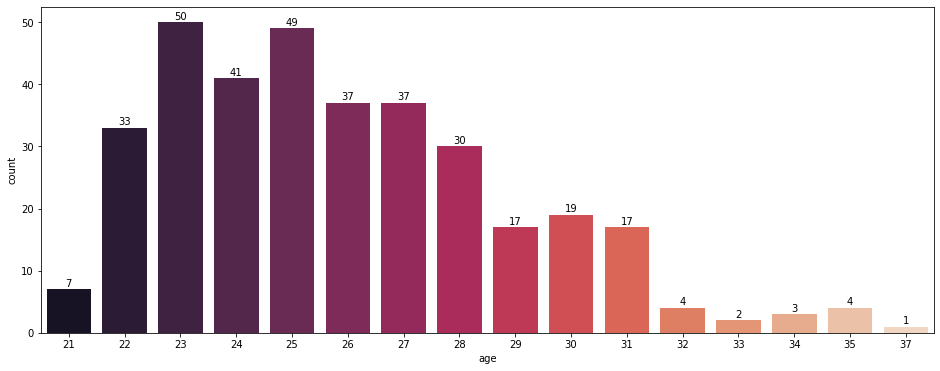

In [13]:
#visualizing the frequecy dirstibution of secondary players by age
plt.figure(figsize=(16,6))
graph = sns.countplot(x='age',data=df,palette='rocket')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")
    
plt.show()

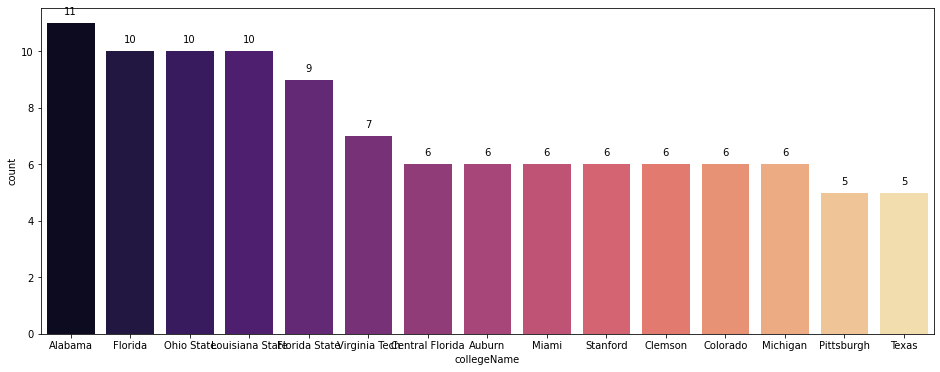

In [14]:
#visualizing frequency distribution of secondary players by college
plt.figure(figsize=(16,6))
graph = sns.countplot(x='collegeName',data=df,palette='magma',
                      order=df.collegeName.value_counts().iloc[:15].index)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")
    
plt.show()

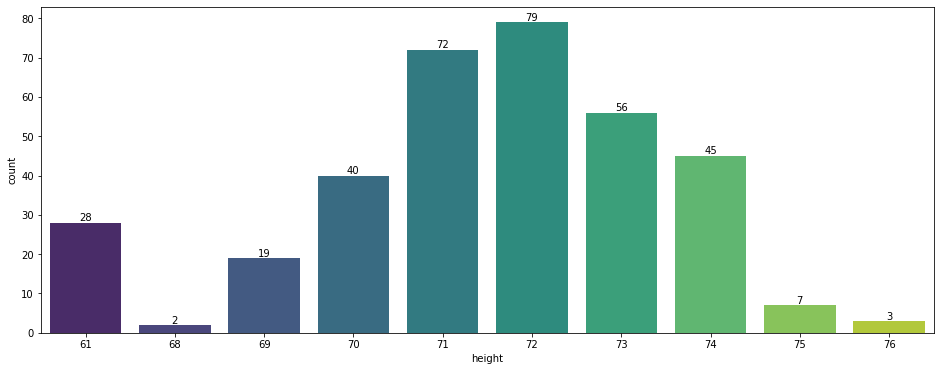

In [15]:
#visualizing the frequecy dirstibution of secondary players by age
plt.figure(figsize=(16,6))
graph = sns.countplot(x='height',data=df,palette='viridis')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")
    
plt.show()

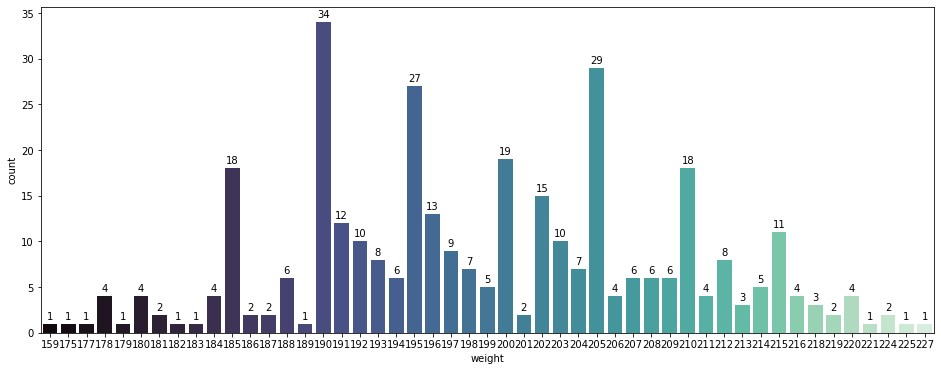

In [16]:
#visualizing the frequecy dirstibution of secondary players by age
plt.figure(figsize=(16,6))
graph = sns.countplot(x='weight',data=df,palette='mako')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")
    
plt.show()

In [17]:
#import week 1 data
week1 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/week1.csv')

In [18]:
week1.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [19]:
week1.isnull().sum()

time                  0
x                     0
y                     0
s                     0
a                     0
dis                   0
o                 66913
dir               66913
event                 0
nflId             66913
displayName           0
jerseyNumber      66913
position          66913
frameId               0
team                  0
gameId                0
playId                0
playDirection         0
route            712708
dtype: int64

In [20]:
week1.drop(['dir','nflId','o','jerseyNumber','route','time','x','y','event','frameId','team','gameId','playId','playDirection'],axis=1)
week1 = week1.drop(['dir','nflId','o','jerseyNumber','route','time','x','y','event','frameId','team','gameId','playId','playDirection'],axis=1)
week1

,s,a,dis,displayName,position
0,0.00,0.01,0.02,Matt Ryan,QB
1,0.01,0.01,0.01,Malcolm Jenkins,SS
2,0.02,0.03,0.01,Julio Jones,WR
3,0.09,0.42,0.01,Corey Graham,FS
4,0.00,0.00,0.00,Mohamed Sanu,WR
...,...,...,...,...,...
986017,1.96,3.79,0.22,Marqui Christian,SS
986018,0.81,1.52,0.09,Cory Littleton,ILB
986019,2.63,4.57,0.27,Jalen Richard,RB
986020,0.15,0.72,0.02,John Johnson,SS


In [21]:
#drop all NAN
week1.dropna()

,s,a,dis,displayName,position
0,0.00,0.01,0.02,Matt Ryan,QB
1,0.01,0.01,0.01,Malcolm Jenkins,SS
2,0.02,0.03,0.01,Julio Jones,WR
3,0.09,0.42,0.01,Corey Graham,FS
4,0.00,0.00,0.00,Mohamed Sanu,WR
...,...,...,...,...,...
986016,2.63,2.49,0.27,Marcus Peters,CB
986017,1.96,3.79,0.22,Marqui Christian,SS
986018,0.81,1.52,0.09,Cory Littleton,ILB
986019,2.63,4.57,0.27,Jalen Richard,RB


In [22]:
df1 = pd.DataFrame(week1)
df1

,s,a,dis,displayName,position
0,0.00,0.01,0.02,Matt Ryan,QB
1,0.01,0.01,0.01,Malcolm Jenkins,SS
2,0.02,0.03,0.01,Julio Jones,WR
3,0.09,0.42,0.01,Corey Graham,FS
4,0.00,0.00,0.00,Mohamed Sanu,WR
...,...,...,...,...,...
986017,1.96,3.79,0.22,Marqui Christian,SS
986018,0.81,1.52,0.09,Cory Littleton,ILB
986019,2.63,4.57,0.27,Jalen Richard,RB
986020,0.15,0.72,0.02,John Johnson,SS


In [23]:
#filtering so only DB's are captured
DB_Pos = ['CB','SS','FS','DB']
df1.loc[df1['position'].isin(DB_Pos)]
df1 = df1.loc[df1['position'].isin(DB_Pos)]
df1

,s,a,dis,displayName,position
1,0.01,0.01,0.01,Malcolm Jenkins,SS
3,0.09,0.42,0.01,Corey Graham,FS
5,0.03,0.02,0.01,Rodney McLeod,FS
8,0.03,0.07,0.01,Ronald Darby,CB
9,0.14,0.05,0.01,Jalen Mills,CB
...,...,...,...,...,...
986010,4.15,1.62,0.42,Nickell Robey-Coleman,CB
986012,4.65,1.28,0.47,Lamarcus Joyner,FS
986016,2.63,2.49,0.27,Marcus Peters,CB
986017,1.96,3.79,0.22,Marqui Christian,SS


In [24]:
#average speed and acceleration for all DB's
df1.groupby('displayName').mean('s')
df1 = df1.groupby('displayName').mean('s')
df1


,s,a,dis
displayName,,,
A.J. Bouye,3.150369,1.918001,0.314957
Aaron Colvin,3.223784,1.931932,0.321142
Adoree' Jackson,3.341275,2.141751,0.332601
Adrian Amos,3.142551,1.855312,0.315051
Anthony Averett,3.542443,1.913790,0.355251
...,...,...,...
Tyrann Mathieu,3.019799,1.984012,0.300460
Vernon Hargreaves,3.213617,1.966934,0.320336
Vonn Bell,3.357417,1.722926,0.334544


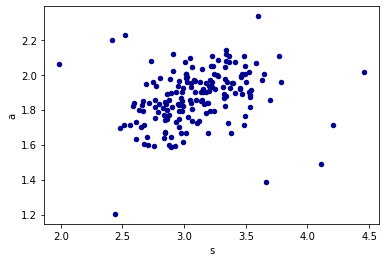

In [25]:
#scatter of speed and acceleration
ax1 = df1.plot.scatter(x='s', y='a', c='DarkBlue')

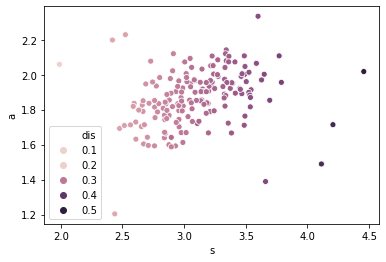

In [26]:
#3 variable scatter plot
sns.scatterplot(x= df1['s'], y = df1['a'], hue = df1['dis'])

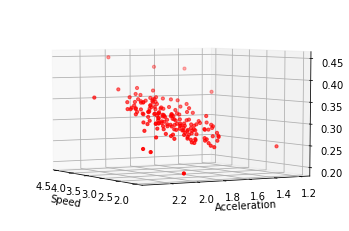

In [27]:
#3d variable scatter plot
x5 = df1['s']
y5 = df1['a']
z5 = df1['dis']

fig = plt.figure()
my3dplot = fig.add_subplot(111, projection = '3d')

my3dplot.scatter(x5,y5,z5, c='r', marker='o', s=10)
my3dplot.set_xlabel('Speed')
my3dplot.set_ylabel('Acceleration')
my3dplot.set_zlabel('Distance')
#Changed the azimuth angle in the x,y plane to make it more visible
#Changed the elevation level in the z plane
my3dplot.view_init(azim=150, elev=5)
plt.show()

In [28]:
#Average speed 3.1 yards/sec
#Average acceleration 1.87 yards/sec^2
df1.describe()

,s,a,dis
count,171.000000,171.000000,171.000000
mean,3.100514,1.871719,0.310050
std,0.345950,0.158165,0.034971
min,1.989140,1.203835,0.198495
25%,2.868912,1.783171,0.286003
50%,3.064116,1.886930,0.307531
75%,3.333519,1.972372,0.332483
max,4.456355,2.334089,0.447290


In [29]:
display(df,df1)

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
5,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
...,...,...,...,...,...,...,...,...
1250,74,203,1989-06-06,Texas Tech,FS,Cody Davis,1989,29
1276,70,195,1994-08-08,Utah State,DB,Dallin Leavitt,1994,24
1278,74,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24
1295,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,1996,22


,s,a,dis
displayName,,,
A.J. Bouye,3.150369,1.918001,0.314957
Aaron Colvin,3.223784,1.931932,0.321142
Adoree' Jackson,3.341275,2.141751,0.332601
Adrian Amos,3.142551,1.855312,0.315051
Anthony Averett,3.542443,1.913790,0.355251
...,...,...,...
Tyrann Mathieu,3.019799,1.984012,0.300460
Vernon Hargreaves,3.213617,1.966934,0.320336
Vonn Bell,3.357417,1.722926,0.334544


In [30]:
#renaming columns so I can merge
df.rename(columns={'displayName' : 'displayName'})
df= df.rename(columns={'displayName' : 'displayName'})
df

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
5,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
...,...,...,...,...,...,...,...,...
1250,74,203,1989-06-06,Texas Tech,FS,Cody Davis,1989,29
1276,70,195,1994-08-08,Utah State,DB,Dallin Leavitt,1994,24
1278,74,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24
1295,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,1996,22


In [31]:
#merge datasets
display(df,df1)

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
5,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
...,...,...,...,...,...,...,...,...
1250,74,203,1989-06-06,Texas Tech,FS,Cody Davis,1989,29
1276,70,195,1994-08-08,Utah State,DB,Dallin Leavitt,1994,24
1278,74,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24
1295,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,1996,22


,s,a,dis
displayName,,,
A.J. Bouye,3.150369,1.918001,0.314957
Aaron Colvin,3.223784,1.931932,0.321142
Adoree' Jackson,3.341275,2.141751,0.332601
Adrian Amos,3.142551,1.855312,0.315051
Anthony Averett,3.542443,1.913790,0.355251
...,...,...,...
Tyrann Mathieu,3.019799,1.984012,0.300460
Vernon Hargreaves,3.213617,1.966934,0.320336
Vonn Bell,3.357417,1.722926,0.334544


In [32]:
#resetting index so I can merge
df1.reset_index(inplace = True)
df1

,displayName,s,a,dis
0,A.J. Bouye,3.150369,1.918001,0.314957
1,Aaron Colvin,3.223784,1.931932,0.321142
2,Adoree' Jackson,3.341275,2.141751,0.332601
3,Adrian Amos,3.142551,1.855312,0.315051
4,Anthony Averett,3.542443,1.913790,0.355251
...,...,...,...,...
166,Tyrann Mathieu,3.019799,1.984012,0.300460
167,Vernon Hargreaves,3.213617,1.966934,0.320336
168,Vonn Bell,3.357417,1.722926,0.334544
169,William Jackson,2.858990,1.749015,0.285553


In [33]:
display(df,df1)

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
5,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
...,...,...,...,...,...,...,...,...
1250,74,203,1989-06-06,Texas Tech,FS,Cody Davis,1989,29
1276,70,195,1994-08-08,Utah State,DB,Dallin Leavitt,1994,24
1278,74,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24
1295,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,1996,22


,displayName,s,a,dis
0,A.J. Bouye,3.150369,1.918001,0.314957
1,Aaron Colvin,3.223784,1.931932,0.321142
2,Adoree' Jackson,3.341275,2.141751,0.332601
3,Adrian Amos,3.142551,1.855312,0.315051
4,Anthony Averett,3.542443,1.913790,0.355251
...,...,...,...,...
166,Tyrann Mathieu,3.019799,1.984012,0.300460
167,Vernon Hargreaves,3.213617,1.966934,0.320336
168,Vonn Bell,3.357417,1.722926,0.334544
169,William Jackson,2.858990,1.749015,0.285553


In [34]:
#merging both data sets together
df2 = pd.merge(df,df1)
df2

,height,weight,birthDate,collegeName,position,displayName,birthYear,age,s,a,dis
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28,3.393040,1.951001,0.339571
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30,3.415141,1.894274,0.341635
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27,3.023297,1.960050,0.301325
3,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23,2.774608,1.935349,0.276380
4,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26,2.957079,1.964550,0.294630
...,...,...,...,...,...,...,...,...,...,...,...
161,72,190,1995-06-29,Ohio State,CB,Gareon Conley,1995,23,3.532509,1.883339,0.352674
162,74,205,1986-04-07,Tennessee State,CB,Dominique Rodgers-Cromartie,1986,32,3.492974,1.763256,0.350771
163,70,200,1993-09-08,West Virginia,SS,Karl Joseph,1993,25,2.524000,2.228686,0.249829
164,70,198,1997-03-18,Pittsburgh,DB,Jordan Whitehead,1997,21,2.418704,2.198148,0.243519


In [35]:
#Average Speed 3.10
#Average Acceleration 1.87
#This is benchmark speed and acceleration for all DB's
df2.describe()

,height,weight,birthYear,age,s,a,dis
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,71.096386,198.813253,1991.596386,26.403614,3.102532,1.869019,0.310310
std,2.787915,9.801426,3.317500,3.317500,0.350245,0.157772,0.035386
min,61.000000,178.000000,1981.000000,21.000000,1.989140,1.203835,0.198495
25%,71.000000,191.000000,1990.000000,24.000000,2.860485,1.781270,0.285678
50%,72.000000,197.000000,1992.000000,26.000000,3.065543,1.881883,0.307623
75%,72.000000,205.000000,1994.000000,28.000000,3.334548,1.970440,0.332574
max,75.000000,220.000000,1997.000000,37.000000,4.456355,2.334089,0.447290


Text(0, 0.5, 'Speed')

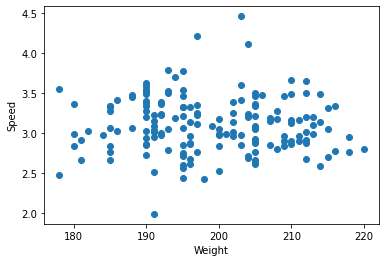

In [36]:
#modeling
#All code below will be linear regression modelling with weight, height, and age as independent variables speed is dependent variable
plt.scatter(df2['weight'],df2['s'])
plt.xlabel('Weight')
plt.ylabel('Speed')

Text(0, 0.5, 'Speed')

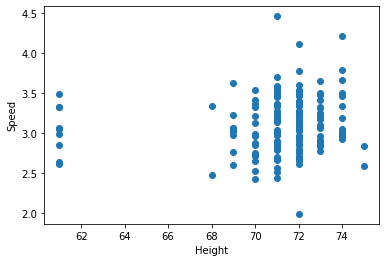

In [37]:
plt.scatter(df2['height'],df2['s'])
plt.xlabel('Height')
plt.ylabel('Speed')

Text(0, 0.5, 'Speed')

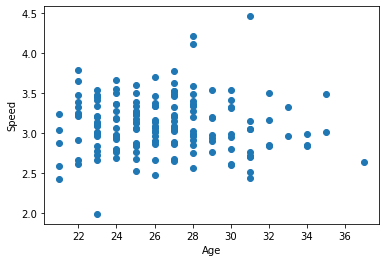

In [38]:
plt.scatter(df2['age'],df2['s'])
plt.xlabel('Age')
plt.ylabel('Speed')

In [39]:
X = df2[['height','weight']]
Y = df2['s']
X

,height,weight
0,72,190
1,70,186
2,69,186
3,73,216
4,70,211
...,...,...
161,72,190
162,74,205
163,70,200
164,70,198


In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [41]:
#Split the data into 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [42]:
##train the model with training data
reg.fit(X_train,Y_train)

LinearRegression()

In [43]:
#show both coefficients
print(reg.coef_)

[ 0.01101952 -0.00101127]


In [44]:
#print predictions on test data for y
Y_pred = reg.predict(X_test)
Y_pred

array([3.11930613, 3.10211452, 3.10514834, 3.10727535, 3.08715439,
       3.10009198, 3.11020469, 3.10717088, 3.11030916, 3.09503562,
       3.1273963 , 3.08502738, 3.08209803, 3.09311755, 3.09109501,
       3.10514834, 3.11424978, 3.10232346, 3.11627232, 3.10807768,
       3.11808593, 3.11829486, 3.12819864, 3.10221899, 3.10828662,
       3.11829486, 3.11222723, 3.11212277, 3.12729184, 3.08827013,
       3.07916869, 3.11930613, 3.10626407, 3.11030916])

In [45]:
#show output for actual observed
Y_test

145    3.524697
143    2.848625
110    2.689072
82     2.515476
163    2.524000
156    2.957919
84     3.082088
121    3.136633
40     3.450525
52     3.487858
141    3.018429
39     3.196737
107    2.653921
85     2.666722
24     3.144894
123    3.202392
165    3.770128
63     3.326334
21     3.525728
117    3.194624
138    2.984571
20     3.085881
83     2.975231
119    2.671696
86     2.860975
97     3.150369
36     3.106869
98     3.179109
28     3.503404
126    3.060879
147    3.227423
161    3.532509
59     3.239547
62     3.469591
Name: s, dtype: float64

In [46]:
#check model performance/accuracy using Mean Squared Error
(np.mean((Y_pred - Y_test)**2))

0.09395521014431532

In [47]:
#check model performance/accuracy using Mean Squared Error function
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

0.0939552101443153

In [48]:
#Linear Regression Model while adding in 'AGE' and 'S' to independent variables for finding acceleration
x = df2[['height','weight','age','a']]
y = df2['s']
x

,height,weight,age,a
0,72,190,28,1.951001
1,70,186,30,1.894274
2,69,186,27,1.960050
3,73,216,23,1.935349
4,70,211,26,1.964550
...,...,...,...,...
161,72,190,23,1.883339
162,74,205,32,1.763256
163,70,200,25,2.228686
164,70,198,21,2.198148


In [49]:
#split data into 80% training 20% testing
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()

In [50]:
#Split the data into 80% train and 20% test
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [51]:
#train the model with training data
Reg.fit(x_train,y_train)

LinearRegression()

In [52]:
#print coefficients/weights for each feature/column of our model
print(Reg.coef_)

[ 0.01886631 -0.00077933  0.00804634  0.56087299]


In [53]:
#print predicitions on test data for y
y_pred = Reg.predict(x_test)
y_pred

array([3.17494557, 3.22322952, 3.12455293, 3.10856827, 2.76721374,
       3.1740958 , 3.01379578, 3.18184779, 3.07683594, 3.05679245,
       3.18368782, 2.91755042, 3.10449379, 2.98859675, 3.20077463,
       3.20350017, 3.20969761, 3.21459844, 3.19424125, 3.17269322,
       3.25083925, 3.00193019, 2.98542912, 3.13953705, 3.14811759,
       3.09222643, 3.06600149, 3.11657086, 2.86753003, 2.96774676,
       3.04355656, 2.98687012, 3.22108217, 3.08184318])

In [54]:
#print the actual values
y_test

48     3.788125
164    2.418704
35     3.537409
115    2.879890
75     2.437640
60     3.179640
156    2.957919
19     3.346623
101    2.843910
73     2.852163
58     3.052727
81     3.324496
80     3.324496
107    2.653921
106    3.052854
23     3.226982
21     3.525728
108    3.017234
91     3.490328
123    3.202392
139    3.363093
33     3.031642
31     3.120190
110    2.689072
13     3.455593
124    3.693813
16     3.161018
67     2.667218
130    3.064116
131    2.976626
143    2.848625
74     2.876849
141    3.018429
37     3.243269
Name: s, dtype: float64

In [55]:
#check model performance/accuracy using Mean Squared Error
(np.mean((y_pred - y_test)**2))

0.0921155909512295

In [56]:
#MSE and SKlearn.metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


0.09211559095122948

In [57]:
#Linear Regression using acceleration as dependent variable
x0 = df2[['height','weight','age','s']]
y0= df2['a']
x0

,height,weight,age,s
0,72,190,28,3.393040
1,70,186,30,3.415141
2,69,186,27,3.023297
3,73,216,23,2.774608
4,70,211,26,2.957079
...,...,...,...,...
161,72,190,23,3.532509
162,74,205,32,3.492974
163,70,200,25,2.524000
164,70,198,21,2.418704


In [58]:
Reg0 = LinearRegression()

In [59]:
#Split the data into 80% train and 20% test
x0_train, x0_test, y0_train,y0_test = train_test_split(x0,y0,test_size = 0.2)

In [60]:
#train the model with training data
Reg0.fit(x0_train,y0_train)

LinearRegression()

In [61]:
#show both coefficients
print(Reg0.coef_)

[ 0.00085559 -0.00271705 -0.01239156  0.08297359]


In [62]:
#print predicitions on test data for y
y0_pred = Reg0.predict(x0_test)
y0_pred

array([1.78963937, 1.80187736, 1.87259327, 1.88415848, 1.83536617,
       1.84088871, 1.80410463, 1.83145784, 1.78697497, 1.86710964,
       1.90958779, 1.91168439, 1.88735017, 1.82533931, 1.78004463,
       1.83012638, 1.80829808, 1.84563065, 1.86653207, 1.90047284,
       1.77852925, 1.89944819, 1.8900797 , 1.75579881, 1.7635605 ,
       1.88398823, 1.92345377, 1.7517484 , 1.88760224, 1.87746366,
       1.93246458, 1.92101165, 1.75848407, 1.82672876])

In [63]:
y0_test

24     2.032063
106    1.950156
67     1.850914
118    1.988211
144    2.000272
137    1.754350
15     1.974099
117    1.835876
64     1.768410
109    2.005978
54     2.065021
13     1.916271
133    1.729226
7      1.958070
11     1.794465
115    1.854871
51     1.886930
125    1.855312
12     1.592537
25     1.789477
26     2.092975
77     1.722926
66     1.931932
102    1.923938
75     1.203835
97     1.918001
38     1.849206
158    1.842787
60     1.955028
96     1.906187
124    1.853652
5      1.990361
94     1.833805
71     1.701990
Name: a, dtype: float64

In [64]:
#MSE 
mean_squared_error(y0_test, y0_pred)

0.02536788505956674

In [65]:
#Linear Regression model for the top 26 coverage players

In [66]:
#filtering in top 26 coverage players based on incompletion rate
top_20_inc = ["James Bradberry","Joe Haden","Byron Jones","Lavonte David","Damarious Randall","Eli Apple","Ronald Darby","Sean David","Denzel Ward","Jalen Ramsey","Jaire Alexander","Marshon Lattimore","Kyle Fuller","Orlando Scandrick","Janoris Jenkins","Stephon Gilmore","Chris Harris","Jimmy Smith","William Jackson","P.J. Williams","T.J. Carrie","Marcus Williams","Minkah Fitzpatrick","Damontae Kazee","Eric Weddle","Marlon Humphrey"]
df2.loc[df2['displayName'].isin(top_20_inc)]
df_top = df2.loc[df2['displayName'].isin(top_20_inc)]
df_top

,height,weight,birthDate,collegeName,position,displayName,birthYear,age,s,a,dis
5,71,190,1993-06-05,San Diego State,SS,Damontae Kazee,1993,25,3.275455,1.990361,0.326753
8,71,193,1994-01-02,Florida State,CB,Ronald Darby,1994,24,2.784252,1.786972,0.277529
15,61,195,1985-01-04,Utah,FS,Eric Weddle,1985,33,3.328082,1.974099,0.331907
18,72,197,1996-07-08,Alabama,CB,Marlon Humphrey,1996,22,3.247617,1.920805,0.324011
30,71,196,1992-08-29,Arizona State,CB,Damarious Randall,1992,26,3.133252,1.850416,0.316005
33,71,191,1997-04-28,Ohio State,CB,Denzel Ward,1997,21,3.031642,1.760222,0.305371
35,71,195,1989-04-14,Florida,CB,Joe Haden,1989,29,3.537409,1.869639,0.356526
41,72,204,1990-07-28,Ohio,CB,T.J. Carrie,1990,28,4.112812,1.489375,0.418984
44,72,196,1992-10-27,Houston,CB,William Jackson,1992,26,2.858990,1.749015,0.285553
71,73,202,1990-09-19,South Carolina,CB,Stephon Gilmore,1990,28,2.959513,1.701990,0.295969


In [67]:
#average speed and acceleration
df_top.groupby('displayName').mean('s')
df3 = df_top.groupby('displayName').mean('s')
df3

,height,weight,birthYear,age,s,a,dis
displayName,,,,,,,
Byron Jones,72.0,205.0,1992.0,26.0,3.461520,1.988211,0.346633
Damarious Randall,71.0,196.0,1992.0,26.0,3.133252,1.850416,0.316005
Damontae Kazee,71.0,190.0,1993.0,25.0,3.275455,1.990361,0.326753
Denzel Ward,71.0,191.0,1997.0,21.0,3.031642,1.760222,0.305371
Eli Apple,73.0,203.0,1995.0,23.0,3.411931,2.073059,0.339821
Eric Weddle,61.0,195.0,1985.0,33.0,3.328082,1.974099,0.331907
Jaire Alexander,70.0,196.0,1997.0,21.0,2.877879,1.766971,0.288792
Jalen Ramsey,73.0,208.0,1994.0,24.0,3.179109,1.779370,0.317867
James Bradberry,73.0,212.0,1993.0,25.0,2.879890,1.854871,0.288097


In [68]:
display(df,df3)

,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
5,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
...,...,...,...,...,...,...,...,...
1250,74,203,1989-06-06,Texas Tech,FS,Cody Davis,1989,29
1276,70,195,1994-08-08,Utah State,DB,Dallin Leavitt,1994,24
1278,74,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24
1295,71,205,1996-08-29,South Alabama,DB,Jeremy Reaves,1996,22


,height,weight,birthYear,age,s,a,dis
displayName,,,,,,,
Byron Jones,72.0,205.0,1992.0,26.0,3.461520,1.988211,0.346633
Damarious Randall,71.0,196.0,1992.0,26.0,3.133252,1.850416,0.316005
Damontae Kazee,71.0,190.0,1993.0,25.0,3.275455,1.990361,0.326753
Denzel Ward,71.0,191.0,1997.0,21.0,3.031642,1.760222,0.305371
Eli Apple,73.0,203.0,1995.0,23.0,3.411931,2.073059,0.339821
Eric Weddle,61.0,195.0,1985.0,33.0,3.328082,1.974099,0.331907
Jaire Alexander,70.0,196.0,1997.0,21.0,2.877879,1.766971,0.288792
Jalen Ramsey,73.0,208.0,1994.0,24.0,3.179109,1.779370,0.317867
James Bradberry,73.0,212.0,1993.0,25.0,2.879890,1.854871,0.288097


In [69]:
#Reset displayName back to column form
df3.reset_index(inplace = True)
df3

,displayName,height,weight,birthYear,age,s,a,dis
0,Byron Jones,72.0,205.0,1992.0,26.0,3.461520,1.988211,0.346633
1,Damarious Randall,71.0,196.0,1992.0,26.0,3.133252,1.850416,0.316005
2,Damontae Kazee,71.0,190.0,1993.0,25.0,3.275455,1.990361,0.326753
3,Denzel Ward,71.0,191.0,1997.0,21.0,3.031642,1.760222,0.305371
4,Eli Apple,73.0,203.0,1995.0,23.0,3.411931,2.073059,0.339821
5,Eric Weddle,61.0,195.0,1985.0,33.0,3.328082,1.974099,0.331907
6,Jaire Alexander,70.0,196.0,1997.0,21.0,2.877879,1.766971,0.288792
7,Jalen Ramsey,73.0,208.0,1994.0,24.0,3.179109,1.779370,0.317867
8,James Bradberry,73.0,212.0,1993.0,25.0,2.879890,1.854871,0.288097
9,Janoris Jenkins,70.0,190.0,1988.0,30.0,3.536302,1.815980,0.353035


In [70]:
#average speed 3.25
#average acceleration 1.85
df3.describe()

,height,weight,birthYear,age,s,a,dis
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,70.842105,197.605263,1992.552632,25.447368,3.264241,1.844538,0.327021
std,2.774150,6.281761,3.157420,3.157420,0.333337,0.130640,0.034528
min,61.000000,190.000000,1985.000000,21.000000,2.784252,1.489375,0.277529
25%,71.000000,193.500000,1991.000000,23.500000,2.995578,1.773170,0.300670
50%,71.000000,196.000000,1993.000000,25.000000,3.275455,1.853652,0.326753
75%,72.000000,202.500000,1994.500000,27.000000,3.436726,1.937498,0.343227
max,73.000000,212.000000,1997.000000,33.000000,4.112812,2.073059,0.418984


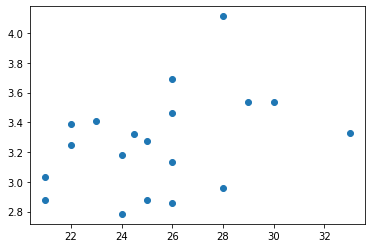

In [71]:
plt.scatter(df3['age'],df3['s'])

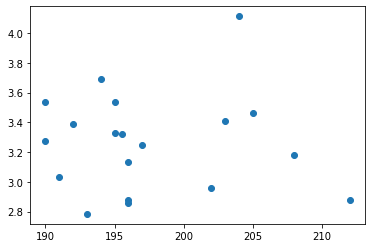

In [72]:
plt.scatter(df3['weight'],df3['s'])

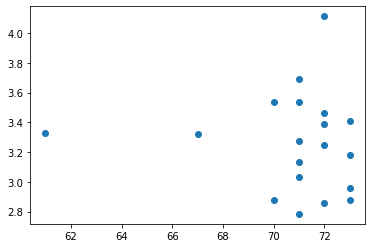

In [73]:
plt.scatter(df3['height'],df3['s'])

In [74]:
X1 = df3[['height','weight','age','s']]
Y1 = df3['a']
X1

,height,weight,age,s
0,72.0,205.0,26.0,3.461520
1,71.0,196.0,26.0,3.133252
2,71.0,190.0,25.0,3.275455
3,71.0,191.0,21.0,3.031642
4,73.0,203.0,23.0,3.411931
5,61.0,195.0,33.0,3.328082
6,70.0,196.0,21.0,2.877879
7,73.0,208.0,24.0,3.179109
8,73.0,212.0,25.0,2.879890
9,70.0,190.0,30.0,3.536302


In [75]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [76]:
#Split the data into 80% train and 20% test
X1_train, X1_test, Y1_train,Y1_test = train_test_split(X1,Y1,test_size = 0.2)

In [77]:
##train the model with training data
reg1.fit(X1_train,Y1_train)

LinearRegression()

In [78]:
#print coefficients/weights for each feature/column of our model
print(reg1.coef_)

[-0.01375485 -0.0024554  -0.01170184 -0.03515874]


In [79]:
#print predicitions on test data for y
Y1_pred = reg1.predict(X1_test)
Y1_pred

array([1.88396595, 1.93174843, 1.85738979, 1.85327762])

In [80]:
#print the actual values
Y1_test

13    1.920805
3     1.760222
1     1.850416
18    1.749015
Name: a, dtype: float64

In [81]:
#MSE and SKlearn.metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(Y1_test, Y1_pred)


0.010424431265663992

In [82]:
X6 = df2[['height','weight','s','a']]
Y6 = df2['age']
X6

,height,weight,s,a
0,72,190,3.393040,1.951001
1,70,186,3.415141,1.894274
2,69,186,3.023297,1.960050
3,73,216,2.774608,1.935349
4,70,211,2.957079,1.964550
...,...,...,...,...
161,72,190,3.532509,1.883339
162,74,205,3.492974,1.763256
163,70,200,2.524000,2.228686
164,70,198,2.418704,2.198148


In [83]:
from sklearn.linear_model import LinearRegression
reg5 = LinearRegression()

In [84]:
X6_train, X6_test, Y6_train,Y6_test = train_test_split(X6,Y6,test_size = 0.2)

In [85]:
reg5.fit(X6_train,Y6_train)

LinearRegression()

In [86]:
print(reg5.coef_)

[-0.43571486  0.03556316  0.29452879 -4.53739261]


In [87]:
Y6_pred = reg5.predict(X6_test)
Y6_pred

array([30.79801326, 27.95250394, 26.41350213, 25.4111959 , 26.42473395,
       26.44095745, 25.99958246, 26.6540069 , 26.95718588, 30.011598  ,
       25.49346231, 30.73161492, 24.80806443, 26.24839205, 26.33838556,
       27.24582294, 25.97410037, 25.64677357, 26.68737364, 27.29988683,
       27.44235299, 26.22626365, 24.21573781, 26.44585048, 27.19901431,
       26.66139451, 26.64483705, 25.81137072, 25.65346611, 26.88122612,
       24.73473725, 25.50315291, 27.09180902, 25.41650096])

In [88]:
Y6_test

81     27
69     31
86     25
13     23
72     26
29     26
121    23
47     26
88     30
26     31
67     26
158    34
56     23
6      31
135    31
129    26
105    22
19     28
89     24
153    28
119    25
11     33
61     25
2      27
134    21
33     21
125    25
144    28
59     25
93     28
108    26
66     27
16     26
9      24
Name: age, dtype: int64

In [89]:
mean_squared_error(Y6_test, Y6_pred)

8.239283649913569

In [90]:
##RandomForestClassifierModel using acceleration as dependent
##Train 80% Test 20%
x2 = df2[['height','weight','a','s']]
y2 = df2['age']


In [91]:
#Test 80% Train20%
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train,y2_test = train_test_split(x2,y2,test_size = 0.2)

In [92]:
#Importing RandomForestClassifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(100)
model.fit(x2_train, y2_train)

RandomForestClassifier()

In [93]:
model.score(x2_test,y2_test)

0.08823529411764706

In [94]:
y2_predicted = model.predict(x2_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,y2_predicted)
cm

array([[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Text(69.0, 0.5, 'result')

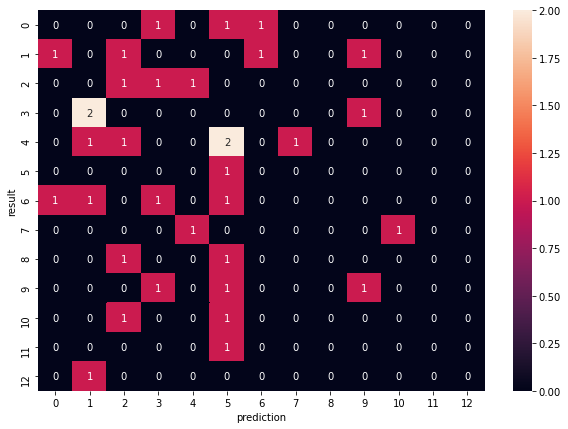

In [95]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('prediction')
plt.ylabel('result')

In [96]:
##Adding in Distance traveled each play to see if it changes anything

In [97]:
##RandomForestClassifierModel using acceleration as dependent
##Train 80% Test 20%
x3 = df2[['height','weight','a','s','dis']]
y3 = df2['age']

In [98]:
#Test 80% Train20%
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train,y3_test = train_test_split(x3,y3,test_size = 0.2)

In [99]:
#Importing RandomForestClassifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(100)
model.fit(x3_train, y3_train)

RandomForestClassifier()

In [100]:
model.score(x3_test,y3_test)

0.17647058823529413

In [101]:
y3_predicted = model.predict(x3_test)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y3_test,y3_predicted)
cm1

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Text(69.0, 0.5, 'result')

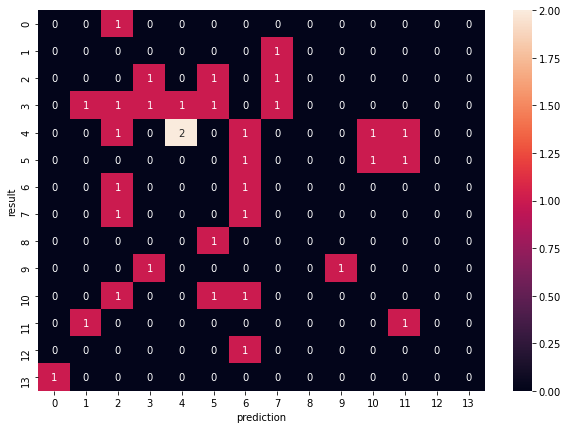

In [102]:
#Much better performance when accounting for distance traveled
#Very difficult to predict age of NFL player likely because of the high level they need to play at in order to be on the field
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('prediction')
plt.ylabel('result')

In [103]:
#RandomForestClassifierModel of top 20 NFL players to try and predict age

x4 = df3[['height','weight','a','s','dis']]
y4 = df3['age']
y4

0     26.0
1     26.0
2     25.0
3     21.0
4     23.0
5     33.0
6     21.0
7     24.0
8     25.0
9     30.0
10    29.0
11    26.0
12    24.5
13    22.0
14    22.0
15    24.0
16    28.0
17    28.0
18    26.0
Name: age, dtype: float64

In [104]:
#Test 30% Train 70%
#Increased test size due to size of data being so small
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train,y4_test = train_test_split(x4,y4,test_size = 0.3)

In [105]:
#Importing RandomForestClassifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(100)
model1.fit(x4_train, y4_train)

ValueError: Unknown label type: 'continuous'

In [106]:
#This model performed exceptionally well in predicting 
model.score(x4_test,y4_test)

0.6666666666666666

In [107]:
y4_predicted = model.predict(x4_test)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y4_test,y4_predicted)
cm2

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

Text(69.0, 0.5, 'result')

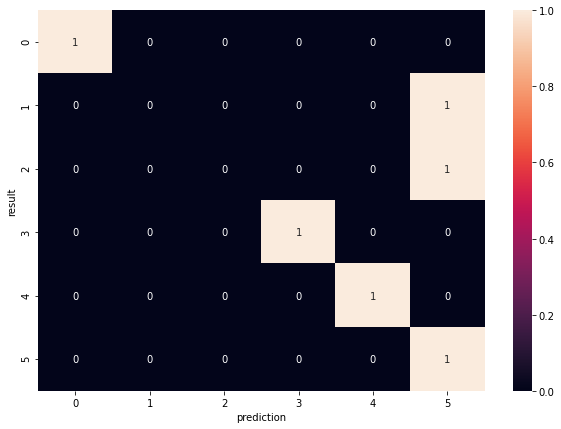

In [108]:
#Due to the small sample size the model had a very high rate of success
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('prediction')
plt.ylabel('result')